# Predicting Species of Iris Data Set using Support Vector Machines
I will be using Support Vector Machines to classify species in the famous Iris dataset. 

I am completing this project as part of the online Udemy course "Python for Data Science and Machine Learning Bootcamp"

# Import Libraries and Retrieve Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image, display
import matplotlib.image as mpimg
from matplotlib import rcParams

As this is a famous dataset, it is already built into the seaborn library.

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


To help visualize what we're aiming for, Here are the three flowers: 

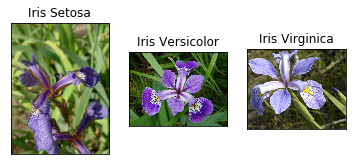

In [6]:
img_A = mpimg.imread('Iris_setosa.jpg')
img_B = mpimg.imread('Iris_versicolor_3.jpg')
img_C = mpimg.imread('Iris_virginica.jpg')

fig, axes = plt.subplots(1,3,frameon=False)

axes[0].imshow(img_A)
axes[0].set_title('Iris Setosa')
axes[1].imshow(img_B)
axes[1].set_title('Iris Versicolor')
axes[2].imshow(img_C)
axes[2].set_title('Iris Virginica')

for ax in axes:
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])


# Exploratory Data Analysis

We'll start by exploring our data to get an understanding of what's happening

In [7]:
import pandas_profiling

In [8]:
pandas_profiling.ProfileReport(iris)

Number of variables,5
Number of observations,150
Total Missing (%),0.0%
Total size in memory,5.9 KiB
Average record size in memory,40.5 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


It looks like there aren't any missing values, but we do have a duplicate row. Let's take a look at it.

In [9]:
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


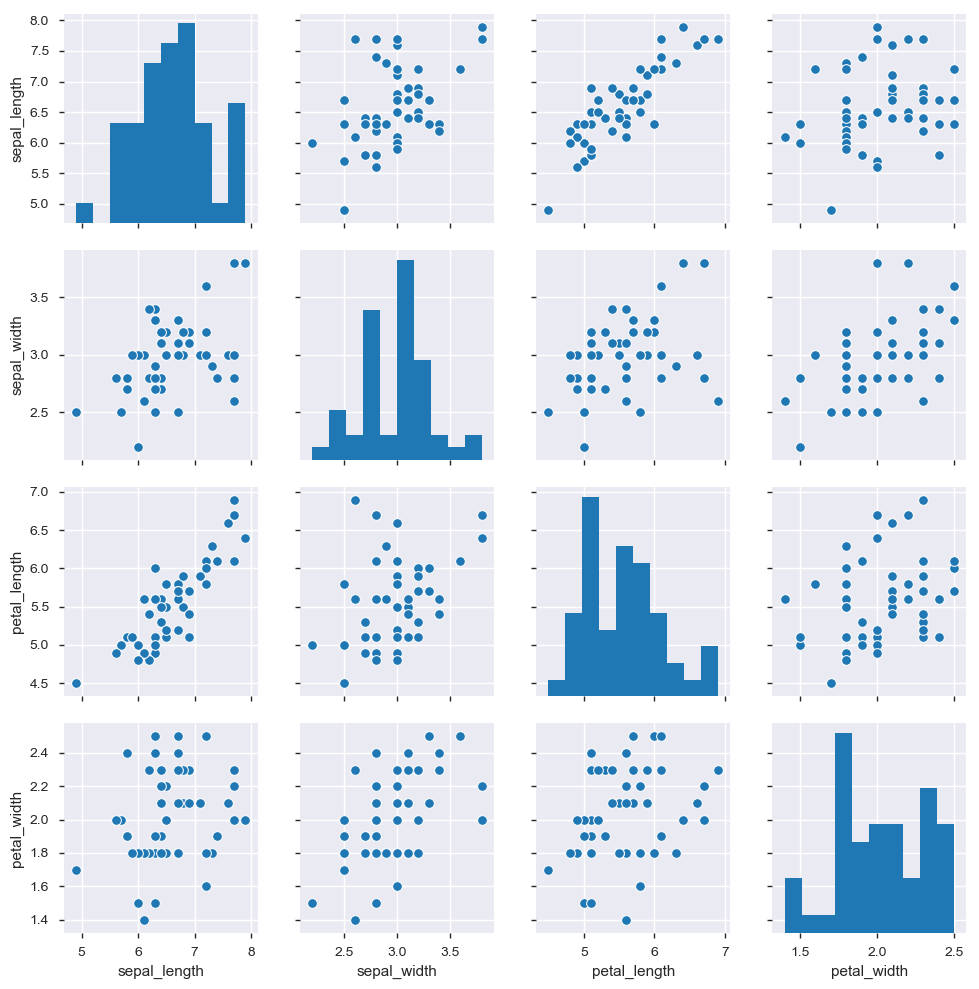

In [10]:
sns.pairplot(iris[iris['species']=='virginica'])

With this being such a famous dataset, it's likely that this is actually a real observation. We can't know the probability of this occuring without knowing the population size, so we'll assume it's a real observation in this instance. If we would like, we could remove it and compare the performance, but it's unlikely that one row will affect the model enough to warrant such a comparison.

We also notice, however, that the pandas profiling is recommending not using petal width for our model due to high correlation with petal length, meaning that petal width is fairly well represented by petal length alone so it appears it may be a little redundant to add it in. While this may be the case, with such a small dataset, any additional data we can have will be beneficial for our classification algorithm.

Let's do some quick visualizing of the dataset

C:\Users\Brandon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


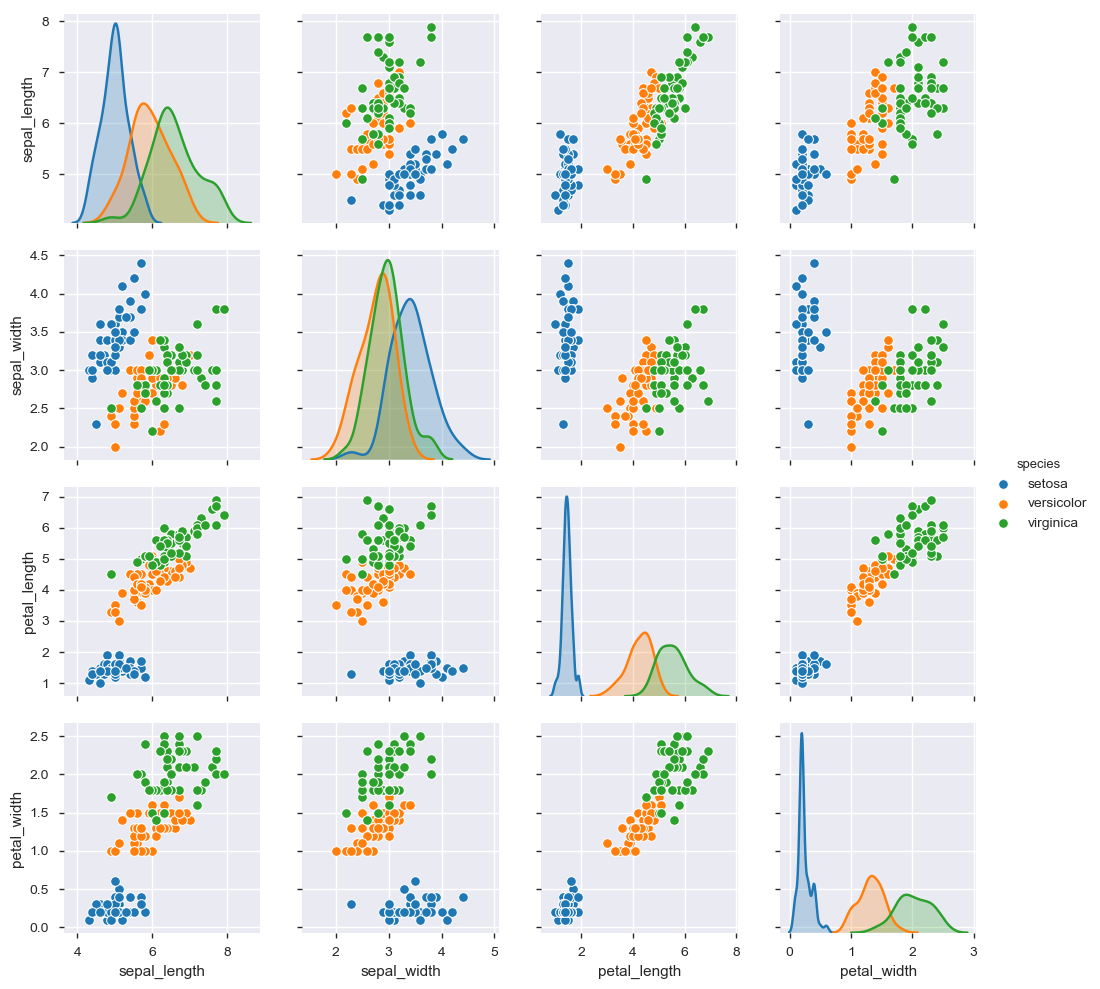

In [11]:
sns.pairplot(iris, hue ='species')

It seems pretty clear that the setosa species is the most easily seperable among all the three species. There seems like there could be some seperation between versicolor and virginica, but it's going to have a little more overlap than the setosa

C:\Users\Brandon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


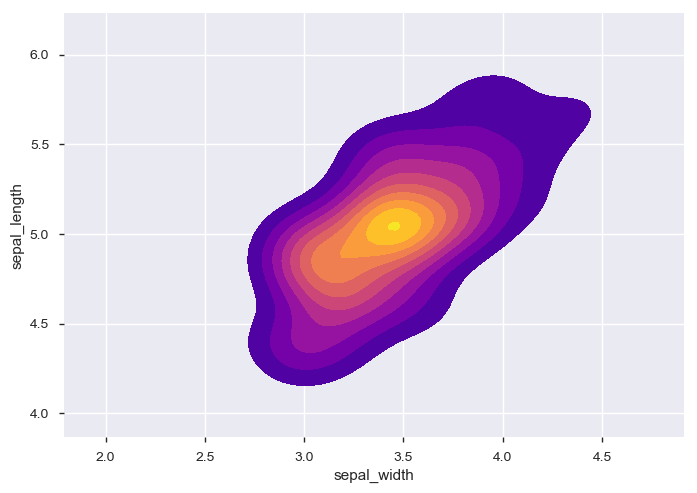

In [41]:
sns.kdeplot(iris[iris['species']=='setosa']['sepal_width'],iris[iris['species']=='setosa']['sepal_length'], cmap = 'plasma',
            shade = True,shade_lowest=False)

# Create Training, Validation, And Test sets

Because we know we'll need to adjust the hyperparameters for this SVM model, we're going to make 3 sets of data - our training set, our validation set, and our test set. We'll train the hyperparameters by checking them with the validation set, and then finally checking with the test set to see how it does against new data

In [13]:
#To encode the target variable
from sklearn import preprocessing

#to split our data sets
from sklearn.model_selection import train_test_split

In [14]:
le = preprocessing.LabelEncoder()
le.fit(iris['species'])
y = le.transform(iris['species'])
X = iris.drop(['species'], axis=1)

In [15]:
#test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

#validation test split (note that we have test size at 25% to maintain 60/20/20% split on entire dataset)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=30)

# Training, Predicting & Evaluating the Model

In [16]:
from sklearn.svm import SVC

In [17]:
model1 = SVC()

In [18]:
model1.fit(X_train,y_train)

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
predictions1 = model1.predict(pd.concat([X_test,X_val],axis=0))

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(pd.concat([pd.Series(y_test),pd.Series(y_val)],axis=0),predictions1))
print(classification_report(pd.concat([pd.Series(y_test),pd.Series(y_val)],axis=0),predictions1))

[[24  0  0]
 [ 0 20  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



It looks like the data is very easy to seperate, so we probably don't need to go beyond this, but, for practice, I want to do gridsearch and see how it changes performance. The only thing it could do would be to stay the same or decrease performance, so I'm not expecting much from this. 

# Grid Search for best hyperparameters

In [22]:
#the parameters we're going to check
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

As we want to use our validation and tests sets on this data, we can use the hypopt package to preserve our validation set when doing Gridsearch. Gridsearch normally uses Kfold cross validation to determine best parameters, therefore choosing the training and validation sets each time. 

In [26]:
from hypopt import GridSearch

In [44]:
gs = GridSearch(model = SVC(), param_grid = param_grid)
gs.fit(X_train, y_train, X_val, y_val)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
print('Test Score for Optimized Parameters:', gs.score(X_test, y_test))

Test Score for Optimized Parameters: 0.9333333333333333


In [31]:
predictions2 = gs.predict(X_test)

In [35]:
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



As we expected, there was only two resultes we could have had from this gridsearch: the same score or a worse score. 

I want to see if SKlearn's gridsearch would perform better:

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
skgrid=GridSearchCV(SVC(),param_grid,verbose=1)

In [38]:
skgrid.fit(pd.concat([X_test,X_val],axis=0),pd.concat([pd.Series(y_test),pd.Series(y_val)],axis=0))

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [39]:
skpred = skgrid.predict(X_test)

In [40]:
print(confusion_matrix(y_test,skpred))
print(classification_report(y_test,skpred))

[[12  0  0]
 [ 0  9  0]
 [ 0  2  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90         9
           2       1.00      0.78      0.88         9

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



It looks like the sklearn gridsearch does about the same performance.

One thing to keep in mind when using Grid Search is that it greatly benefits from having more data. As we have a relatively small dataset, the effects of Grid Search won't be as great due to limited options in doing the cross validation when using sklearn's Grid Search. For using hypopt, one limitation is the number of parameters we use to search. We could try to find the perfect parameters by expanding the list we use to test in order to find the best parameters (though, in our case, the original default parameters performed best).

# Conclusion

We performed classification on the famous Iris dataset using Support Vector Machines. Support Vector Machines was a great candidate for this dataset due to fairly clear seperations in the data when we visualized the data. As this dataset only had 4 input variables, visualizing the data may help give you a hint of what model would be best to use, but, ultimately, the best way to find out is empirically trying various models. We also used two different kinds of Grid Searches, one using a validation set (using the hypopt package) and the other using kfold cross validation (using the sklearn package). Due to limited data, Grid Search didn't help our performance of our model. 